In [4]:
import requests
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

API_KEY = 'c1lq1mzoyp1z0nx6bsqi9lrk'
request_data = {'api_key':'c1lq1mzoyp1z0nx6bsqi9lrk'}

listing_id = 570279570
request = str('https://openapi.etsy.com/v2/listings/'+str(listing_id))
r = requests.get(request, request_data).json()

In [3]:
# Load models and data structures
views_est = joblib.load('tfidf_views_GradientBoostingRegressor.pkl') 
price_est = joblib.load('tfidf_price_GradientBoostingRegressor.pkl') 
lda = joblib.load('tf_lda.pkl') 
nmf = joblib.load('tfidf_nmf.pkl')
listings = joblib.load('listings.pkl')
features = joblib.load('all_features.pickle')
tf_features = joblib.load('tf_features.pkl')
tfidf_features = joblib.load('tfidf_features.pkl')
tf_vectorizer = joblib.load('tf_vectorizer.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

tf_feature_names = tf_vectorizer.get_feature_names()
prices = np.nan_to_num(listings['price'].tolist())
views = np.nan_to_num(listings['views'].tolist())
favorers = np.nan_to_num(listings['num_favorers'].tolist())
test_size = 0.1

tfidf_price_train, tfidf_price_test, y_price_train, y_price_test = train_test_split(
    tfidf_features, prices, test_size = test_size)

tfidf_views_train, tfidf_views_test, y_views_train, y_views_test = train_test_split(
    tfidf_features, views, test_size = test_size)

In [27]:
predicted_prices = price_est.predict(tfidf_features)
sorted_prices, sorted_predicted_prices = zip(*sorted(zip(prices, predicted_prices), reverse=True))

In [52]:
predicted_views = views_est.predict(tfidf_features)

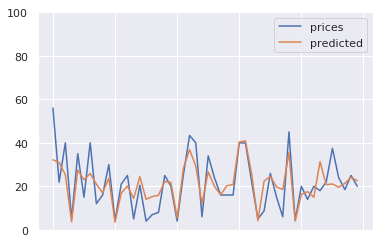

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(prices[:50], label='prices')
plt.plot(predicted_prices[:50], label='predicted')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both')      # both major and minor ticks are affected
plt.ylim(0,100)
plt.legend()
plt.show()
#plt.savefig('plot')
plt.clf()

In [51]:
#Test price regression
mae_prices = mean_absolute_error(prices, predicted_prices)
print("MAE: %.4f" % mae_prices)

MAE: 5.3962


In [ ]:
#Test views regression
mae_views = mean_absolute_error(y_views_test, views_est.predict(tfidf_views_test))
print("MAE: %.4f" % mae_views)

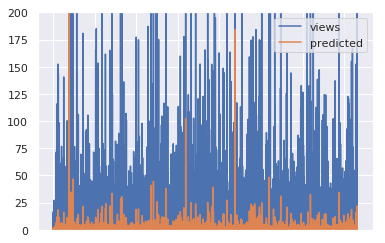

<Figure size 432x288 with 0 Axes>

In [59]:
plt.plot(views[:], label='views')
plt.plot(predicted_views[:], label='predicted')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both')      # both major and minor ticks are affected
plt.ylim(0,200)
plt.legend()
plt.show()
#plt.savefig('plot')
plt.clf()

In [ ]:
plt.scatter(k_size, inertias, c='black', s=100, alpha=0.5);